# **Tutorial - 2**
## **Text Processing for Natural Language Processing (NLP)**

In text processing for NLP, Bag of Words (BoW) is a simple model where a text is represented as a collection of words, disregarding grammar and order, focusing only on word frequency. TF-IDF (Term Frequency-Inverse Document Frequency) improves upon BoW by assigning weights to words based on their importance, emphasizing words that are common in a document but rare across other documents. Word2Vec, a more advanced approach, generates dense word embeddings by training a neural network to map words to vectors, capturing semantic relationships and similarities between words based on context in large datasets. In this tutorial we will be looking at the following topics:
1) **Bag of Words (BoW)**
2) **Term Frequency-Inverse Document Frequency (TF-IDF)**
3) **Encodings**
4) **Word Embeddings**
5) **Word2Vec** 

====================================================================================================

<style>
blue {
  color: skyblue;
}
</style>

## 1) **Bag of Words (BoW)**

Bag of Words (BoW) is a simple text representation method used in NLP where a document is represented by the <blue>**frequency**</blue> of words in it, <blue>**without considering grammar**</blue>, <blue>**order**</blue>, or <blue>**context**</blue>. It treats every word as <blue>**independent**</blue> and counts its occurrences in the text. For example, in the sentences "The cat sits on the mat" and "The dog sits on the mat", the BoW would capture the words "The", "cat", "sits", "on", "the", "mat", "dog", with their respective frequencies. However, BoW <blue>**cannot capture meaning**</blue> or relationships between words, as it focuses solely on word presence and counts.

In [1]:
import nltk
from nltk.stem import WordNetLemmatizer 
import re
from nltk.corpus import stopwords

# Defining all pre-processing steps
def preprocessing_text(text):
    lemmatizer = WordNetLemmatizer()
    emoji_pattern = r'^(?:[\u2700-\u27bf]|(?:\ud83c[\udde6-\uddff]){1,2}|(?:\ud83d[\udc00-\ude4f]){1,2}|[\ud800-\udbff][\udc00-\udfff]|[\u0021-\u002f\u003a-\u0040\u005b-\u0060\u007b-\u007e]|\u3299|\u3297|\u303d|\u3030|\u24c2|\ud83c[\udd70-\udd71]|\ud83c[\udd7e-\udd7f]|\ud83c\udd8e|\ud83c[\udd91-\udd9a]|\ud83c[\udde6-\uddff]|\ud83c[\ude01-\ude02]|\ud83c\ude1a|\ud83c\ude2f|\ud83c[\ude32-\ude3a]|\ud83c[\ude50-\ude51]|\u203c|\u2049|\u25aa|\u25ab|\u25b6|\u25c0|\u25fb|\u25fc|\u25fd|\u25fe|\u2600|\u2601|\u260e|\u2611|[^\u0000-\u007F])+$'
    
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)  
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(emoji_pattern, '', text)
    text= re.sub(r'\s+', ' ', text)
    text= text.lower().strip()
    
    return text

paragraph = """Welcome to the NLP - Deep Learning Bootcamp. 
            Hope that you have watched all the resources uploaded on our official notion page.
            If you have not please begin there, thanks!
            """

sentences_list = nltk.sent_tokenize(paragraph)
 
corpus = [preprocessing_text(sentence) for sentence in sentences_list]

print(corpus)

['welcome nlp deep learning bootcamp', 'hope watched resource uploaded official notion page', 'if please begin there thanks']


In [2]:
# Creating a Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
X_array = X.toarray()

print("Unique Word List: \n", feature_names)
print("Bag of Words Matrix: \n", X_array)

Unique Word List: 
 ['begin' 'bootcamp' 'deep' 'hope' 'if' 'learning' 'nlp' 'notion'
 'official' 'page' 'please' 'resource' 'thanks' 'there' 'uploaded'
 'watched' 'welcome']
Bag of Words Matrix: 
 [[0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0]
 [1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0]]


In [4]:
# Visualizing results in tabular form
import pandas as pd

df = pd.DataFrame(data=X_array, columns=feature_names, index=corpus)
(df)

,begin,bootcamp,deep,hope,if,learning,nlp,notion,official,page,please,resource,thanks,there,uploaded,watched,welcome
welcome nlp deep learning bootcamp,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1
hope watched resource uploaded official notion page,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,1,0
if please begin there thanks,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0


<style>
blue {
  color: skyblue;
}
</style>

## 2) **Term Frequency-Inverse Document Frequency (TF-IDF)**

TF-IDF is an extension of BoW that <blue>**assigns**</blue> a <blue>**weight**</blue> to each word, reflecting its <blue>**importance**</blue> in a document relative to a collection of documents (corpus). <blue>**Term Frequency (TF)**</blue> refers to <blue>**how often**</blue> a word appears in a document, while <blue>**Inverse Document Frequency (IDF)**</blue> measures <blue>**how rare**</blue> a word is across the entire corpus. Words that occur frequently in one document but rarely across others get higher TF-IDF scores. For example, <blue>**common words**</blue> like "the" and "is" receive <blue>**low weights**</blue>, while more <blue>**unique words**</blue> like "neural" in an article about AI would have a <blue>**higher weight**</blue>, giving a better sense of relevance.

In [6]:
from nltk.stem import WordNetLemmatizer 
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Define all pre-processing steps except for Lemmatization
def preprocessing_text(text):
    emoji_pattern = r'^(?:[\u2700-\u27bf]|(?:\ud83c[\udde6-\uddff]){1,2}|(?:\ud83d[\udc00-\ude4f]){1,2}|[\ud800-\udbff][\udc00-\udfff]|[\u0021-\u002f\u003a-\u0040\u005b-\u0060\u007b-\u007e]|\u3299|\u3297|\u303d|\u3030|\u24c2|\ud83c[\udd70-\udd71]|\ud83c[\udd7e-\udd7f]|\ud83c\udd8e|\ud83c[\udd91-\udd9a]|\ud83c[\udde6-\uddff]|\ud83c[\ude01-\ude02]|\ud83c\ude1a|\ud83c\ude2f|\ud83c[\ude32-\ude3a]|\ud83c[\ude50-\ude51]|\u203c|\u2049|\u25aa|\u25ab|\u25b6|\u25c0|\u25fb|\u25fc|\u25fd|\u25fe|\u2600|\u2601|\u260e|\u2611|[^\u0000-\u007F])+$'
    
    text= text.lower()
    text = text.split()
    text = ' '.join(text)  
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(emoji_pattern, '', text)
    text= re.sub(r'\s+', ' ', text)
    
    return text

comments = """Welcome to the NLP - Deep Learning Bootcamp. 
            Hope that you have watched all the resources uploaded on our official notion page.
            If you have not please begin there, thanks!
            """

sentences_list = nltk.sent_tokenize(comments)
corpus = [preprocessing_text(sentence) for sentence in sentences_list]
corpus

['welcome to the nlp deep learning bootcamp',
 'hope that you have watched all the resources uploaded on our official notion page',
 'if you have not please begin there thanks']

In [8]:
# Calculating Product of Term Frequency & Inverse Document Frequency 
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
terms = tfidf_vectorizer.get_feature_names_out()
df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

df

,all,begin,bootcamp,deep,have,hope,if,learning,nlp,not,...,resources,thanks,that,the,there,to,uploaded,watched,welcome,you
0,0.000000,0.000000,0.389888,0.389888,0.000000,0.000000,0.000000,0.389888,0.389888,0.000000,...,0.000000,0.000000,0.000000,0.296520,0.000000,0.389888,0.000000,0.000000,0.389888,0.000000
1,0.280219,0.000000,0.000000,0.000000,0.213114,0.280219,0.000000,0.000000,0.000000,0.000000,...,0.280219,0.000000,0.280219,0.213114,0.000000,0.000000,0.280219,0.280219,0.000000,0.213114
2,0.000000,0.373801,0.000000,0.000000,0.284285,0.000000,0.373801,0.000000,0.000000,0.373801,...,0.000000,0.373801,0.000000,0.000000,0.373801,0.000000,0.000000,0.000000,0.000000,0.284285


In [9]:
# Creating a Word Cloud
texts = [
    "Python is a popular programming language.",
    "NLP is a field of artificial intelligence that focuses on the interaction between computers and human language.",
    "Sentiment analysis is the process of classifying the emotional intent of text.",
    "Machine learning is an important application of AI.",
    "Natural Language Processing is used for text analysis.",
    "Python libraries like scikit-learn and NLTK are used in NLP.",
    "AI and machine learning are transforming industries.",
    "If you are interested in NLP, stay tuned!"
]

In [10]:
import re

def clean_text(text):
    clean_txt = text.lower()
    # Clear characters other than numbers and letters of the alphabet only
    clean_txt = re.sub(r'[^0-9a-zçğıiöşü\s]', '', clean_txt,
                       flags=re.IGNORECASE)  

    return ' '.join(sorted(clean_txt.split()))

cleaned_texts = [clean_text(text) for text in texts]

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(cleaned_texts)

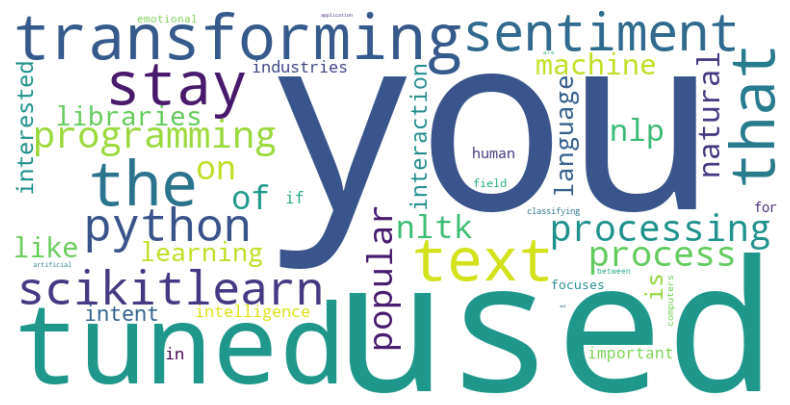

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vectorizer.vocabulary_)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<style>
blue {
  color: skyblue;
}
</style>

## 3) **Encodings**

<blue>**Label Encoding**</blue> is a technique used in machine learning and data processing to convert <blue>**categorical data**</blue> (such as text-based or symbolic data) into <blue>**numerical values**</blue>. For example, if you have categories like “Apple”, “Chicken” and “Broccoli” you assign them numerical labels such as 1 for “Apple”, 2 for “Chicken” and 3 for “Broccoli”.

<blue>**One-hot Encoding**</blue> is another technique used in machine learning to convert <blue>**categorical data**</blue> into a format that can be provided to machine learning algorithms more easily. One-hot Encoding takes each categorical value and turns it into a <blue>**binary vector**</blue>. Each category is represented as a binary vector.

<div style="font-style: italic; text-align: center;" markdown="1">
<img width="50%" src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*SCDSszFK7eHFedP502Xe_A.png">
</div>

In [20]:
import nltk
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Download NLTK data
nltk.download('punkt')

# Sample corpus
corpus = [
    "Python is a popular programming language.",
    "NLP is a field of artificial intelligence that focuses on the interaction between computers and human language.",
    "Sentiment analysis is the process of classifying the emotional intent of text.",
    "Machine learning is an important application of AI.",
    "Natural Language Processing is used for text analysis.",
    "Python libraries like scikit-learn and NLTK are used in NLP.",
    "AI and machine learning are transforming industries.",
    "If you are interested in NLP, stay tuned!"
]

# Tokenize the corpus using NLTK
tokenized_corpus = [nltk.word_tokenize(sentence.lower()) for sentence in corpus]

# Flatten the list to get all words in the corpus
all_words = [word for sentence in tokenized_corpus for word in sentence]

# Get unique words (vocabulary)
vocab = sorted(set(all_words))

# Print vocabulary
print("Vocabulary:", vocab)

# Reshape the list of words into a 2D array for OneHotEncoder
word_array = np.array(all_words).reshape(-1, 1)

# Apply OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(word_array)

# Print the one-hot encoded data
print("One-hot encoded matrix:\n", one_hot_encoded)


Vocabulary: ['!', ',', '.', 'a', 'ai', 'an', 'analysis', 'and', 'application', 'are', 'artificial', 'between', 'classifying', 'computers', 'emotional', 'field', 'focuses', 'for', 'human', 'if', 'important', 'in', 'industries', 'intelligence', 'intent', 'interaction', 'interested', 'is', 'language', 'learning', 'libraries', 'like', 'machine', 'natural', 'nlp', 'nltk', 'of', 'on', 'popular', 'process', 'processing', 'programming', 'python', 'scikit-learn', 'sentiment', 'stay', 'text', 'that', 'the', 'transforming', 'tuned', 'used', 'you']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


('One-hot encoded matrix:\n',
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]))

<style>
blue {
  color: skyblue;
}
</style>

## 4) **Word Embeddings**

Word embeddings are <blue>**dense vector representations**</blue> of words that capture their meanings by placing words with <blue>**similar meanings closer**</blue> in <blue>**vector space**</blue>. Unlike BoW or one-hot encoding, embeddings <blue>**capture relationships**</blue> between words based on context. For example, in an embedding space, words like "king" and "queen" or "apple" and "fruit" would be closer together, reflecting their <blue>**semantic similarity**</blue>. These embeddings are learned from large datasets and can be used as inputs to machine learning models for various NLP tasks. Popular techniques for generating word embeddings include <blue>**Word2Vec**</blue>, <blue>**GloVe**</blue>, and <blue>**FastText**</blue>.

<style>
blue {
  color: skyblue;
}
</style>

## 5) **Word2Vec**

Word2Vec is a model used to <blue>**learn word embeddings**</blue>, developed by <blue>**Google**</blue>. It transforms words into <blue>**continuous vector representations**</blue> using neural networks. There are two primary approaches: <blue>**Skip-gram**</blue> and <blue>**Continuous Bag of Words (CBOW)**</blue>. Skip-gram <blue>**predicts surrounding words**</blue> given a <blue>**target word**</blue>, while CBOW <blue>**predicts**</blue> the <blue>**target word**</blue> based on its <blue>**context**</blue>. For example, in the sentence "The dog barked loudly", Skip-gram might learn that "dog" is likely to appear near words like "barked", while CBOW learns that "dog" fits between "The" and "barked". This method helps capture semantic relationships between words in a computationally efficient manner.

<div style="font-style: italic; text-align: center;" markdown="1">
<img width="50%" src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*Myt4SWgexvTgzVKAuh525Q.png">
</div>

In [33]:
import gensim
from gensim.models import Word2Vec

sentences = [
    ['this', 'is', 'an', 'example', 'sentence', 'for', 'word2vec'],
    ['we', 'are', 'creating', 'a', 'word2vec', 'model', 'using', 'the', 'gensim', 'library'],
    ['we', 'are', 'working', 'with', 'cbow', 'and', 'skipgram', 'models'],
    ['python', 'is', 'a', 'programming', 'language', 'for', 'natural', 'language', 'processing'],
    ['word2vec', 'is', 'one', 'of', 'the', 'word', 'embedding', 'techniques'],
    ['the', 'word2vec', 'model', 'is', 'used', 'for', 'word', 'embeddings'],
    ['gensim', 'provides', 'an', 'easy', 'way', 'to', 'train', 'word2vec', 'models'],
    ['cbow', 'and', 'skipgram', 'are', 'two', 'types', 'of', 'word2vec', 'models'],
    ['word2vec', 'is', 'a', 'technique', 'for', 'natural', 'language', 'processing'],
    ['this', 'sentence', 'is', 'about', 'word2vec', 'and', 'its', 'applications'],
    ['word2vec', 'is', 'a', 'popular', 'word', 'embedding', 'method'],
    ['many', 'researchers', 'use', 'word2vec', 'for', 'various', 'nlp', 'tasks'],
    ['the', 'skipgram', 'model', 'focuses', 'on', 'predicting', 'context', 'words'],
    ['cbow', 'model', 'predicts', 'the', 'center', 'word', 'from', 'context', 'words'],
    ['natural', 'language', 'processing', 'involves', 'working', 'with', 'large', 'datasets']
]

cbow_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0, alpha=0.03, min_alpha=0.0007, epochs=100)
skipgram_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1, alpha=0.03, min_alpha=0.0007, epochs=100)

cbow_model.train(sentences, total_examples=len(sentences), epochs=100)
skipgram_model.train(sentences, total_examples=len(sentences), epochs=100)

word_vectors_cbow = cbow_model.wv
similarity_cbow = word_vectors_cbow.similarity('word2vec', 'gensim')
print(f"Similarity between 'word2vec' and 'gensim': {similarity_cbow} with CBOW")


word_vectors_skipgram= skipgram_model.wv
similarity_skip = word_vectors_skipgram.similarity('word2vec', 'gensim')
print(f"Similarity between 'word2vec' and 'gensim': {similarity_skip} with Skip-Gram")

Similarity between 'word2vec' and 'gensim': 0.9972226619720459 with CBOW
Similarity between 'word2vec' and 'gensim': 0.9975585341453552 with Skip-Gram
